Question 1

x[n] = 2$\delta$(n) - $\delta$(n-1) - 3$\delta$(n-2)\
y[n] = $\frac{1}{2}$(x[n] + x[n-1]) = $\frac{1}{2}$(2$\delta$(n) - $\delta$(n-1) - 3$\delta$(n-2) + 2$\delta$(n-1) - $\delta$(n-2) - 3$\delta$(n-3))\
 = $\frac{1}{2}$(2$\delta$(n) + $\delta$(n-1) - 4$\delta$(n-2) - 3$\delta$(n-3))\
 = $\delta$(n) + $\frac{1}{2}$ $\delta$(n-1) - 2$\delta$(n-2) - $\frac{3}{2}$$\delta$(n-3)

Question 2

a) M = 15, N = 35:
$\omega_{0}p = 2\pi k$, $\omega_{0} = \frac{2\pi M}{N} = \frac{2\pi*3}{7}$ $\Rightarrow p = 7$

b) M = 7, N = 13:
$\omega_{0}p = 2\pi k$, $\omega_{0} = \frac{2\pi M}{N} = \frac{2\pi*7}{13}$ $\Rightarrow p = 13$

a) M = 21, N = 3:
$\omega_{0}p = 2\pi k$, $\omega_{0} = \frac{2\pi M}{N}$ = $\frac{2\pi*7}{1}$ $\Rightarrow p = 1$

Question 3

a) $e^{\frac{i\pi}{3}}(1 + \frac{1}{2}i)$


In [1]:
import math
import numpy as np

a_2 = 1
b_2 = 1/2

r_2 = math.sqrt(pow(a_2, 2) + pow(b_2, 2))
phi_2 = np.arctan2(b_2, a_2)

$1 + \frac{1}{2}i = r_{2}e^{i*\phi_{2}}$ \
$e^{\frac{i\pi}{3}}*r_{2}e^{i*\phi_{2}} = r_{2}e^{i(\pi/3 + \phi_{2})} $

In [2]:
print(r_2)
print(math.pi/3 + phi_2)

1.118033988749895
1.5108451601974038


Euler's notation: $e^{\frac{i\pi}{3}}(1 + \frac{1}{2}i) = 1.12e^{i(1.51)}$\
Standard notation from Euler's notation: $a = r\cos(\phi), b = r\sin(\phi)$

In [3]:
r = r_2
phi = math.pi/3 + phi_2
a = r*np.cos(phi)
b = r*np.sin(phi)

print(a)
print(b)

0.06698729810778077
1.1160254037844386


Standard notation: $e^{\frac{i\pi}{3}}(1 + \frac{1}{2}i) = .067 + 1.12i$


b) $(e^{\frac{i \pi}{2}})^{-1}$

Euler's notation: $(e^{\frac{i \pi}{2}})^{-1} = e^{i (\frac{-\pi}{2})} = \cos(\frac{-\pi}{2}) + i\sin(\frac{-\pi}{2})$

Standard notation: $e^{i (\frac{-\pi}{2})} = \cos(\frac{-\pi}{2}) + i\sin(\frac{-\pi}{2}) = 0 - i = -i$


c) $(3 + 2i)^{1/2}$

In [4]:
a = 3
b = 2
r = math.sqrt(pow(a, 2) + pow(b, 2))
phi = np.arctan2(b, a)

print(r)
print(phi)

3.605551275463989
0.5880026035475675


Euler's notation: $(3 + 2i)^{1/2} = (3.6e^{i(.6)})^{1/2} = 3.6e^{i(.3)}$

In [5]:
r = r
phi = phi * .5
a = r*math.cos(phi)
b = r*math.sin(phi)

print(a)
print(b)

3.4508443768440187
1.0448316069128152


Standard notation: $(3 + 2i)^{1/2} = 3.45 + 1.04i$

4a) FFCF: $y[n] = g*x[n-N] + x[n]$\
    FBCF: $y[n] = g*y[n-N] + x[n]$

4b) The feed-forward comb filter and feedback comb filter are LTI's since they are simply summations of constant scalings on constant time-shifted sequences.


4c)

In [6]:
def FFCF(x, N, g):
  y = np.zeros(len(x))
  for n in range(0, len(x)):
    if n < N:
      y[n] = x[n] #x[n-N] = 0 for n < N
    else:
      y[n] = g*x[n-N] + x[n]
  return y
def FBCF(x, N, g):
  y = np.zeros(len(x))
  for n in range(0, len(x)):
    if n < N:
      y[n] = x[n]
    else:
      y[n] = g*y[n-N] + x[n]
  return y

4d)

In [7]:
import wave
from IPython.display import Audio

woodchuck_file = wave.open("woodchuck.wav")
nframes = woodchuck_file.getnframes()
woodchuck_signal = np.frombuffer(woodchuck_file.readframes(nframes), dtype = np.int16)

# Converting the signal values to float for better numerical processing
woodchuck_signal = woodchuck_signal.astype(float)

# The frame rate, or sampling rate, in Hz
framerate = woodchuck_file.getframerate()

# Play the audio interactively in the notebook
woodchuck_audio = Audio(data = woodchuck_signal, rate = framerate)
woodchuck_audio

In [8]:
delay = .1 #100 ms
nframes_delay = delay*framerate
g = .75

y_FFCF = FFCF(woodchuck_signal, int(nframes_delay), g)
y_FBCF = FBCF(woodchuck_signal, int(nframes_delay), g)

In [9]:
woodchuck_audio_FFCF = Audio(data = y_FFCF.astype(float), rate = framerate)
woodchuck_audio_FFCF

In [10]:
woodchuck_audio_FBCF = Audio(data = y_FBCF.astype(float), rate = framerate)
woodchuck_audio_FBCF

The FFCF filter creates a single echo of the original audio, while the FBCF creates what sounds like mulitple echoes.

4e)

In [11]:
delay = .1 #100 ms
nframes_delay = delay*framerate
g = 1

y_FFCF = FFCF(woodchuck_signal, int(nframes_delay), g)
y_FBCF = FBCF(woodchuck_signal, int(nframes_delay), g)

In [12]:
woodchuck_audio_FFCF = Audio(data = y_FFCF.astype(float), rate = framerate)
woodchuck_audio_FFCF

In [13]:
woodchuck_audio_FBCF = Audio(data = y_FBCF.astype(float), rate = framerate)
woodchuck_audio_FBCF

The FBCF filter gets progressively more echo-ey to the point where the audio gets completely drowned out in the end. I imagine this is because the FBCF filter, with a gain of 1, compounds on itself, reaching its peak further in time. The FFCF audio sounds similar to its original version. This is because the scalar increase isn't feeding-back/compounding on the output signal.

4f)

In [14]:
y_FBCF_1 = FBCF(woodchuck_signal, int(100*framerate), .75)
y_FBCF_2 = FBCF(woodchuck_signal, int(90*framerate), .8)
y_FBCF_3 = FBCF(woodchuck_signal, int(120*framerate), .77)
y_FBCF_4 = FBCF(woodchuck_signal, int(110*framerate), .73)

In [15]:
y_FBCF_1234 = y_FBCF_1 + y_FBCF_3 + y_FBCF_3 + y_FBCF_4
woodchuck_audio_FBCF_1234 = Audio(data = y_FBCF_1234.astype(float), rate = framerate)
woodchuck_audio_FBCF_1234

The echo is gone from part d! It sounds like the original audio.

4g)

In [16]:
n = np.arange(-10, 11)
unit_impulse = np.zeros(21)
unit_impulse[10] = 1

<ipython-input-17-4a68ff64df50>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, unit_impulse)


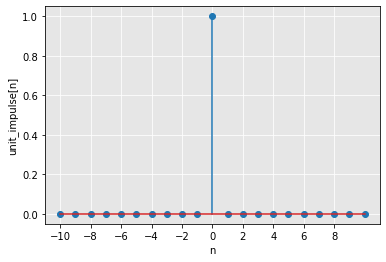

In [17]:
import matplotlib.pyplot as plt

plt.stem(n, unit_impulse)
plt.xlabel('n')
plt.ylabel('unit_impulse[n]')
ax = plt.gca()
ax.set_facecolor((0.9,0.9,0.9))
plt.grid(color = 'white')
plt.xticks(np.arange(-5, 5) * 2)
plt.show()

4h)

In [18]:
delay = .1 #100 ms
nframes_delay = delay*10
g1 = .75
g2 = 1

h_FFCF_g1 = FFCF(unit_impulse, int(nframes_delay), g1)
h_FBCF_g1 = FBCF(unit_impulse, int(nframes_delay), g1)
h_FFCF_g2 = FFCF(unit_impulse, int(nframes_delay), g2)
h_FBCF_g2 = FBCF(unit_impulse, int(nframes_delay), g2)

<ipython-input-19-89357acbde1c>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(h_FFCF_g1)


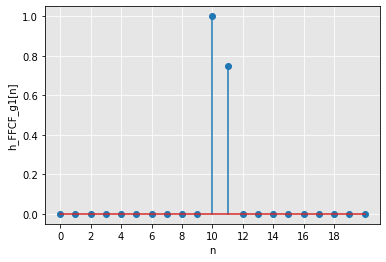

In [19]:
plt.stem(h_FFCF_g1)
plt.xlabel('n')
plt.ylabel('h_FFCF_g1[n]')
ax = plt.gca()
ax.set_facecolor((0.9,0.9,0.9))
plt.grid(color = 'white')
plt.xticks(np.arange(0, 10) * 2)
plt.show()

<ipython-input-20-fd2ab310631c>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(h_FBCF_g1)


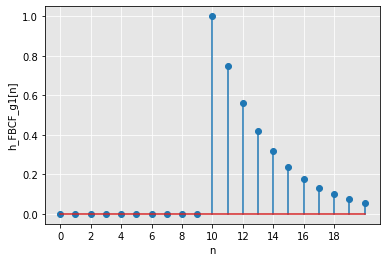

In [20]:
plt.stem(h_FBCF_g1)
plt.xlabel('n')
plt.ylabel('h_FBCF_g1[n]')
ax = plt.gca()
ax.set_facecolor((0.9,0.9,0.9))
plt.grid(color = 'white')
plt.xticks(np.arange(0, 10) * 2)
plt.show()

<ipython-input-21-bc65dc52a04d>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(h_FFCF_g2)


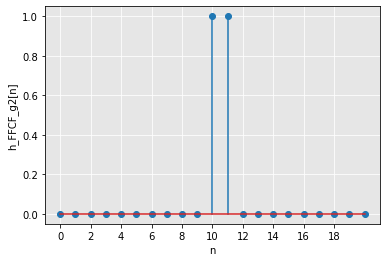

In [21]:
plt.stem(h_FFCF_g2)
plt.xlabel('n')
plt.ylabel('h_FFCF_g2[n]')
ax = plt.gca()
ax.set_facecolor((0.9,0.9,0.9))
plt.grid(color = 'white')
plt.xticks(np.arange(0, 10) * 2)
plt.show()

<ipython-input-22-2933aff4e81a>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(h_FBCF_g2)


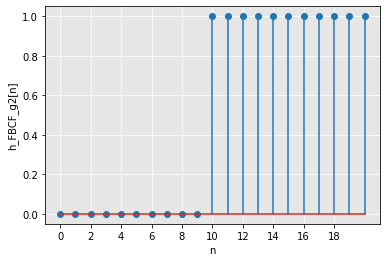

In [22]:
plt.stem(h_FBCF_g2)
plt.xlabel('n')
plt.ylabel('h_FBCF_g2[n]')
ax = plt.gca()
ax.set_facecolor((0.9,0.9,0.9))
plt.grid(color = 'white')
plt.xticks(np.arange(0, 10) * 2)
plt.show()

The idea is that the FFCF will not write to itself, so there will only be two spikes. One where the impulse was in the original signal and one where the sample value is equal to the delay, as that will return a scalar of the original impulse. When the gain is 0.75, the signal decays, and when it is 1 it maintains. For the FBCF, the signal is writing back to itself each time. So after the original impulse spike, that will be stored in the output sequence, and will be compounded on in subsequent outputs. Whether it decays or maintains also depends on g.

4i)

In [23]:
def convolve(x, h):
  y = np.zeros(len(x) + len(h) - 1)
  h_padded = np.concatenate((np.concatenate((np.zeros(len(x)-1),h)), np.zeros(len(x)-1)))
  for i in range(len(y)):
    rev_h_padded = np.flip(h_padded[i:i + len(x)])
    y[i] = np.dot(x, rev_h_padded)
  return y

In [24]:
x = np.array([1, .5, 2])
h = np.array([1, 2, 3])

In [25]:
print(convolve(x, h))

[1.  2.5 6.  5.5 6. ]


In [26]:
print(np.convolve(x, h))

[1.  2.5 6.  5.5 6. ]


4j)

In [27]:
unit_impulse = np.zeros(int(nframes))
unit_impulse[int(nframes/2)] = 1

In [28]:
delay = .1 #100 ms
nframes_delay = delay*framerate
g = .75

FBCF_unit_response = FBCF(unit_impulse, int(nframes_delay), g)

In [29]:
convolution = convolve(woodchuck_signal, FBCF_unit_response)

In [30]:
woodchuck_audio_convolution = Audio(data = convolution.astype(float), rate = framerate)
woodchuck_audio_convolution

It sounds the same as part 4d! The idea is that the FBCF(woodchuck.wav) should equal convolve(woodchuck.wav, FBCF(unit_impulse_n)) since FBCF is an LTI, and LTI's can be expressed as convolutions. The difference is that the convolution signal is longer since it is padded. This doesn't add additional audio since it was the inpulse response was padded with 0's in the convolution.